Cluster assignments:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1]


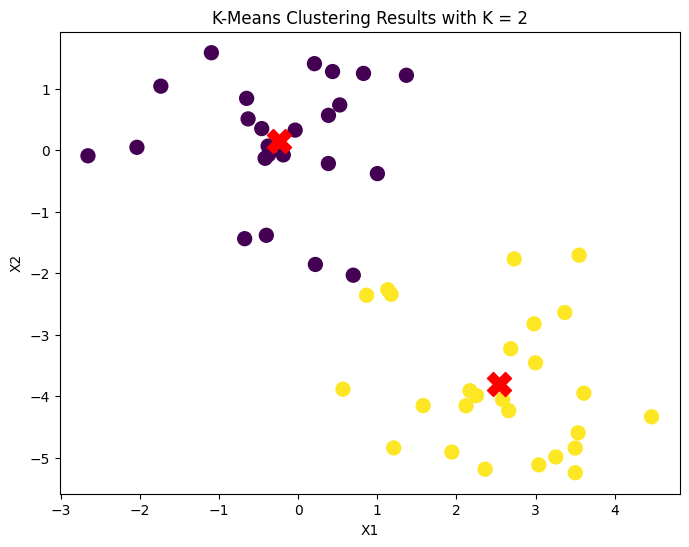

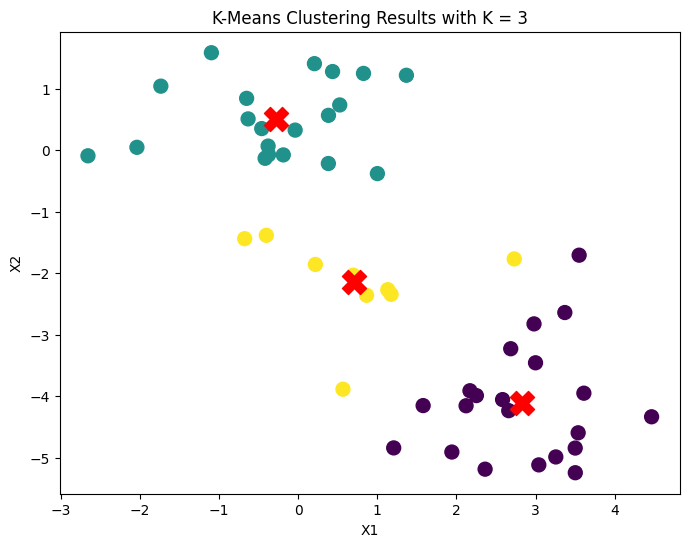

Total within-cluster sum of squares (n_init=1): 69.68153367378949
Total within-cluster sum of squares (n_init=20): 68.97379200939724


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# تنظیم seed برای تولید داده‌های مشابه
np.random.seed(2)

# شبیه‌سازی داده‌های دو بعدی با مولتی وریته نرمال
x = np.random.randn(50, 2)

# تغییر مقادیر برخی از داده‌ها برای ایجاد دو خوشه
x[:25, 0] += 3  # جابجایی خوشه اول در بعد اول
x[:25, 1] -= 4  # جابجایی خوشه اول در بعد دوم

# اجرای K-means با K=2
kmeans = KMeans(n_clusters=2, n_init=20, random_state=2)
kmeans.fit(x)

# چاپ تخصیص خوشه‌ها
print("Cluster assignments:")
print(kmeans.labels_)

# رسم نتایج
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, cmap='viridis', s=100, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("K-Means Clustering Results with K = 2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# تغییر تعداد خوشه‌ها به 3
kmeans_3 = KMeans(n_clusters=3, n_init=20, random_state=2)
kmeans_3.fit(x)

# رسم نتایج برای K=3
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=kmeans_3.labels_, cmap='viridis', s=100, marker='o')
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("K-Means Clustering Results with K = 3")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# مقایسه استفاده از n_init مختلف
kmeans_1_init = KMeans(n_clusters=3, n_init=1, random_state=2)
kmeans_1_init.fit(x)
print("Total within-cluster sum of squares (n_init=1):", kmeans_1_init.inertia_)

kmeans_20_init = KMeans(n_clusters=3, n_init=20, random_state=2)
kmeans_20_init.fit(x)
print("Total within-cluster sum of squares (n_init=20):", kmeans_20_init.inertia_)


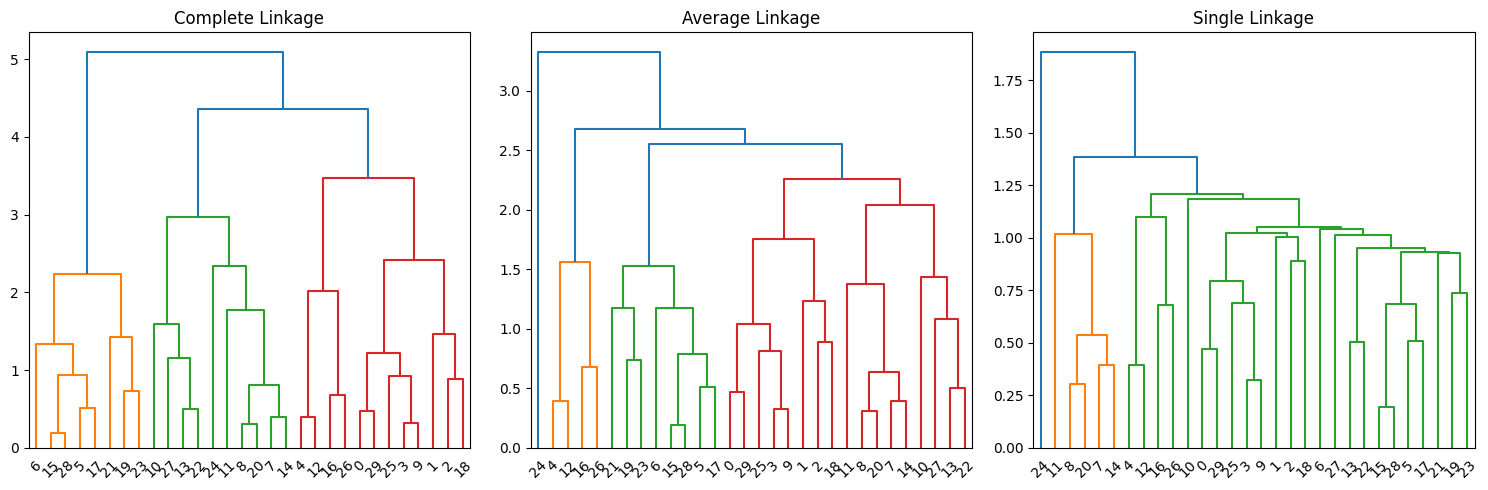

Complete Linkage Clusters: [2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 1 2 1 2 1 2 1 2 2 2 2 1 2]
Average Linkage Clusters: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1]
Single Linkage Clusters: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1]
Complete Linkage Clusters (4 clusters): [4 4 4 4 3 1 1 2 2 4 2 2 3 2 2 1 3 1 4 1 2 1 2 1 2 4 3 2 1 4]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# 1. تولید داده‌ها: مولتی‌ وریات نرمال با میانگین صفر و واریانس یک
np.random.seed(42)  # برای تولید داده‌های مشابه در هر بار اجرا
x = np.random.normal(0, 1, (30, 3))  # 30 مشاهدات و 3 ویژگی

# 2. مقیاس‌دهی داده‌ها (اگر نیاز باشد)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 3. محاسبه فاصله بین مشاهدات با استفاده از فاصله اقلیدسی
# 3.1. Complete Linkage
Z_complete = linkage(x_scaled, method='complete')
# 3.2. Average Linkage
Z_average = linkage(x_scaled, method='average')
# 3.3. Single Linkage
Z_single = linkage(x_scaled, method='single')

# 4. رسم دندروگرام‌ها برای هر روش لینک‌سازی
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# رسم دندروگرام‌ها بدون استفاده از 'above_threshold_color' و 'below_threshold_color'
dendrogram(Z_complete, ax=axs[0])
axs[0].set_title('Complete Linkage')

dendrogram(Z_average, ax=axs[1])
axs[1].set_title('Average Linkage')

dendrogram(Z_single, ax=axs[2])
axs[2].set_title('Single Linkage')

plt.tight_layout()
plt.show()

# 5. برش دندروگرام‌ها برای تعیین تعداد خوشه‌ها
# 5.1. تعداد خوشه‌ها: 2
clusters_complete = fcluster(Z_complete, 2, criterion='maxclust')
clusters_average = fcluster(Z_average, 2, criterion='maxclust')
clusters_single = fcluster(Z_single, 2, criterion='maxclust')

# چاپ نتایج خوشه‌بندی
print(f"Complete Linkage Clusters: {clusters_complete}")
print(f"Average Linkage Clusters: {clusters_average}")
print(f"Single Linkage Clusters: {clusters_single}")

# 5.2. تعداد خوشه‌ها: 4 (برای مثال)
clusters_complete_4 = fcluster(Z_complete, 4, criterion='maxclust')
print(f"Complete Linkage Clusters (4 clusters): {clusters_complete_4}")
